In [4]:
import pandas as pd
import numpy as np
import pickle

%matplotlib inline

In [5]:
with open("datasets/parsed_filtered_df.pkl", "rb") as handle:
    main_df = pickle.load(handle)

In [6]:
def search_df(df, search_terms, search_exclusive=False):
    # Lowercase search terms
    search_terms = [t.lower() for t in search_terms]
    
    # Create a boolean array to subset the dataframe with search matching terms
    if search_exclusive:
        search_filter_bool = np.ones(len(df), dtype=bool)
        
        for term in search_terms:
            search_filter_bool = search_filter_bool & df['main'].str.lower().str.contains(term)
    else:
        search_filter_bool = np.zeros(len(df), dtype=bool)

        for term in search_terms:
            search_filter_bool = search_filter_bool | df['main'].str.lower().str.contains(term)
    
    return df[search_filter_bool]

In [7]:
# If we want to see only tweets with an opinion (because the mean takes zeros into account)
# Also, makes computations a lot faster
main_df_opinion = main_df[main_df["sentiment"] != 0]

## Example 1: swiss trains by state

In [8]:
cff_search = search_df(main_df_opinion, ["cff", "sbb", "ffs"])

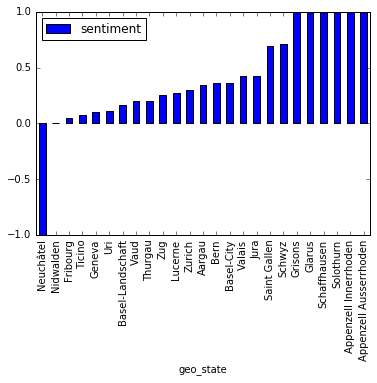

In [9]:
cff_search.groupby("geo_state").mean().sort_values(by="sentiment").plot(kind="bar")

In [10]:
def filter_lang(df, langs):
    return df[df['lang'].isin(langs)]

In [11]:
def keep_relevant_states(df, threshold = 20):
    return df.groupby("geo_state").filter(lambda x: x.count()["main"] > threshold)

## Example 2: saudi arabia by gender

In [12]:
saudi_search = search_df(main_df_opinion, ["saudi arabia"])
saudi_search.groupby("author_gender").mean()

,sentiment
author_gender,
FEMALE,-0.157895
MALE,-0.101124
UNKNOWN,-0.098039


## Example 3: Hillary vs Trump by state

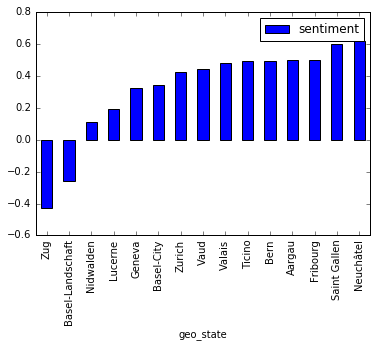

In [13]:
trump_search = search_df(main_df_opinion, ["donald", "trump"], search_exclusive=True)
trump_search = keep_relevant_states(trump_search)
trump_search.groupby("geo_state").mean().sort_values("sentiment").plot(kind="bar")

In [14]:
trump_search["sentiment"].mean()

0.3323713323713324

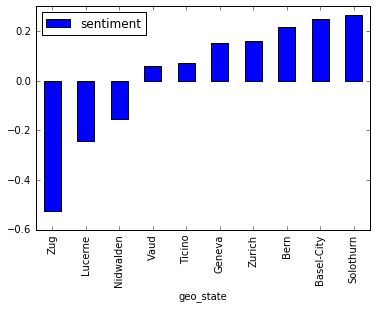

In [15]:
hillary_search = search_df(main_df_opinion, ["hillary", "clinton"], search_exclusive=True)
hillary_search = keep_relevant_states(hillary_search)
hillary_search.groupby("geo_state").mean().sort_values("sentiment").plot(kind="bar")

In [16]:
hillary_search["sentiment"].mean()

0.0853966649823143

## Example 4: Marijuana by state

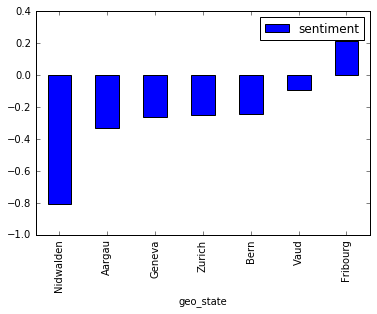

In [17]:
weed_search = search_df(main_df_opinion, ["marijuana", "cannabis", "weed"], search_exclusive=False)
weed_search = keep_relevant_states(weed_search)
weed_search.groupby("geo_state").mean().sort_values("sentiment").plot(kind="bar")

## Example 5: bad example, most tweets are radio tweets

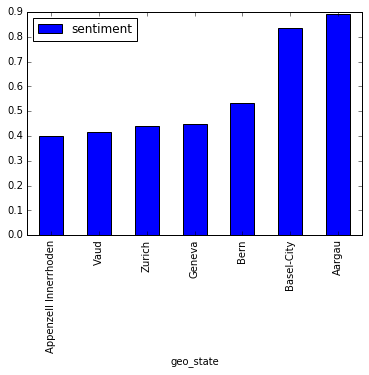

In [18]:
bieber_search = search_df(main_df_opinion, ["Justin", "Bieber"], search_exclusive=True)
bieber_search = keep_relevant_states(bieber_search)
bieber_search.groupby("geo_state").mean().sort_values("sentiment").plot(kind="bar")

In [19]:
bieber_search[bieber_search["geo_state"] == "Aargau"]

,author_gender,geo_state,lang,main,published,source_location,sentiment
28136,UNKNOWN,Aargau,en,THIS IS CUTW ASFhttps://twitter.com/987ampradi...,2016-08-02 17:09:27,"5h, ddl, ag, tk, NYD, 1D, t100",1.0
109722,UNKNOWN,Aargau,en,Now playing: 'Love Yourself' by 'Justin Bieber',2016-08-06 07:37:55,"Zofingen, Switzerland",1.0
135322,UNKNOWN,Aargau,en,Now playing: 'Sorry' by 'Justin Bieber',2016-08-07 21:56:29,"Zofingen, Switzerland",-1.0
221277,UNKNOWN,Aargau,en,Now playing: 'Where Are Ãœ Now' by 'Skrillex &...,2016-08-09 01:36:45,"Zofingen, Switzerland",1.0
296924,MALE,Aargau,en,@AllyBrooke @justinbieber DAMN GIRL THESE VOCALS,2016-08-11 23:01:36,4/6 ; AG ; SG,-1.0
299840,MALE,Aargau,en,@AllyBrooke @ashleejuno @djsnake @justinbieber...,2016-08-11 23:03:02,4/6 ; AG ; SG,-1.0
315967,UNKNOWN,Aargau,en,Cold water // @MAJORLAZER @justinbieber @MOMOM...,2016-08-12 04:33:02,somewhere cold,-1.0
368439,UNKNOWN,Aargau,en,Now playing: 'Where Are Ãœ Now' by 'Skrillex &...,2016-08-13 19:05:20,"Zofingen, Switzerland",1.0
402999,UNKNOWN,Aargau,en,Damonhttps://twitter.com/myboycrush/status/735...,2016-08-14 12:41:05,somewhere cold,1.0
424609,UNKNOWN,Aargau,en,Now playing: 'Cold Water - HOT SONG' by 'Major...,2016-08-15 10:26:26,"Zofingen, Switzerland",1.0


## Example 6: Roesti mentions, by state

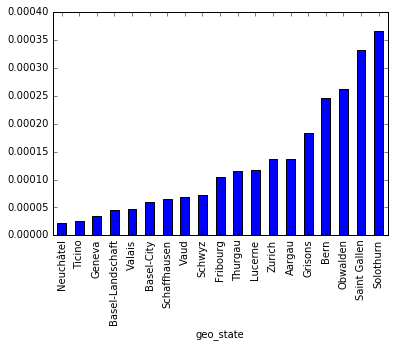

In [20]:
# Ratio of roesti tweets
roesti_search = search_df(main_df, ["rösti", "roesti", "röschti", "roeschti"], search_exclusive=False)
roesti_tweets = roesti_search.groupby("geo_state")["main"].count()

total_tweets = main_df.groupby("geo_state")["main"].count()
(roesti_tweets / total_tweets).dropna().sort_values().plot(kind="bar")

## Example 7: McDonalds, by state

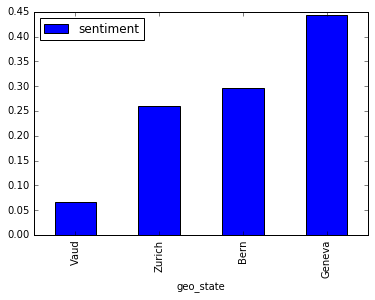

In [21]:
mcdo_search = search_df(main_df_opinion, ["mcdo"], search_exclusive=True)
mcdo_search = keep_relevant_states(mcdo_search)
mcdo_search.groupby("geo_state").mean().sort_values("sentiment").plot(kind="bar")

## Example 8: Are people happier on the week-end?

In [22]:
main_df_opinion["weekday"] = main_df_opinion["published"].apply(lambda x: x.weekday())

C:\Users\bls73\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
main_df_opinion[main_df_opinion["geo_state"] == "Zurich"].groupby("weekday").mean()

,sentiment
weekday,
0,0.406316
1,0.409613
2,0.410054
3,0.407843
4,0.420369
5,0.408759
6,0.406033


Other ideas:
* implication of canton into subject (count(subject) / count(total))

In [32]:
days = [0, 1, 2]
langs = ['en', 'fr']
main_df_opinion[main_df_opinion['weekday'].isin(days)].sample(10)

,author_gender,geo_state,lang,main,published,source_location,sentiment,weekday
3008719,UNKNOWN,Zurich,en,"Paralympics day 4: McFadden begins gold rush, ...",2016-09-12 00:04:12,Zurich,1.0,0
933991,UNKNOWN,Zurich,en,New ​technology '​Eco-Bio ​Block' for clean #G...,2016-08-29 11:39:48,Zurich,1.0,0
2559857,FEMALE,Bern,en,literally hate November Arsenal always flop,2016-10-31 12:32:31,Switzerland,-1.0,0
722473,UNKNOWN,Zurich,en,@taallida ready roses are my favorites,2016-08-23 11:26:54,None,1.0,1
2221490,FEMALE,Nidwalden,en,"@Sarahdipity I read the hashtag as ""I'm mobile...",2016-10-25 04:25:55,nw,1.0,1
2838051,FEMALE,Schaffhausen,de,.@Seiteneingang für “Gespräche“ wird es zu lau...,2016-09-07 14:49:24,"Norddeutschland, Ostsee, SH",1.0,2
1008960,UNKNOWN,Bern,en,#NowPlaying The Veronicas - You Ruin Me - http...,2016-08-30 21:06:01,"Bern, Switzerland",-1.0,1
153800,UNKNOWN,Zurich,en,♫ _Algol_ - Aware Of Universe's Inevitable Col...,2016-08-08 06:12:11,Zurich,1.0,0
3033119,UNKNOWN,Zug,en,The Better Story wins. @StevenLoepfe @Storylea...,2016-09-12 17:11:38,"Zug, Switzerland",1.0,0
1044141,UNKNOWN,Zurich,en,Produce labeling is good and some seasonality ...,2016-08-31 19:51:13,"Zürich, Switzerland",1.0,2


## Testing stuff for app

In [45]:
def filter_lang(df, langs):
    """ filter the df with one or several languages """
    return df[df['lang'].isin(langs)]

def filter_relevant_states(df, threshold):
    """ keep states that have more than `threshold` tweets """
    return df.groupby("geo_state").filter(lambda x: x.count()["main"] > threshold)

def append_weekday(df):
    df["weekday"] = df["published"].apply(lambda x: x.weekday())

def filter_weekday(df, days): #drop weekday after?
    return df[df['weekday'].isin(days)]

def filter_df(df, langs = ['en'], days = [0, 1, 2, 3, 4, 5, 6], threshold=0):
    # Language filter
    df = filter_lang(df, langs)
    # Threshold filter if necessary
    if threshold > 0:
        df = filter_relevant_states(df, threshold)
    # Weekday filter
    append_weekday(df)
    df = filter_weekday(df, days)
    df.drop('weekday', 1)
    return df

In [47]:
filter_df(main_df_opinion, ['es'], [0,1,2]).sample(1)

C:\Users\bls73\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,author_gender,geo_state,lang,main,published,source_location,sentiment,weekday
941870,UNKNOWN,Ticino,es,Denada :)https://twitter.com/Wincestiel2090/st...,2016-08-29 02:30:49,"Lugano,Buenos Aires,Argentina",1.0,0


In [102]:
def get_happy_sad_tweet(df, happy):
    if happy:
        selected_state = main_df_opinion.groupby("geo_state").mean().sort_values(by='sentiment', ascending=False).index[0]
    else:
        selected_state = main_df_opinion.groupby("geo_state").mean().sort_values(by='sentiment', ascending=False).index[-1]
    # getting indexes of tweets in the happiest/saddest state
    indexes = main_df_opinion[main_df_opinion['geo_state'] == selected_state]['main'].index
    # randomly selecting one of them
    indexes_list = list(indexes)
    random_index = int(random()*len(list(indexes)))
    tweet_selected_index = indexes_list[random_index]
    return main_df_opinion.loc[tweet_selected_index]['main']
    

In [103]:
get_happy_sad_tweet(main_df_opinion, False)

'#SamAdams #RaiseTheStein Hoist at #Skins 1/2 time today! Winner gets $20 gift certificate! #happyhouralldaypic.twitter.com/bZaTnl6sUA'

In [95]:
from random import random
happy_state = main_df_opinion.groupby("geo_state").mean().sort_values(by='sentiment', ascending=False).index[0]
sad_state = main_df_opinion.groupby("geo_state").mean().sort_values(by='sentiment', ascending=False).index[-1]

indexes = main_df_opinion[main_df_opinion['geo_state'] == happy_state]['main'].index
indexes_list = list(indexes)
random_index = int(random()*len(list(indexes)))
tweet_selected_index = indexes_list[random_index]
main_df_opinion.loc[tweet_selected_index]['main']

'Meine neue Arbeitslounge :) @ rogerruckstuhl.ch https://www.instagram.com/p/BJm6-ekASzR/\xa0'